<a href="https://colab.research.google.com/github/imaswath/US-Election-20-Tweets-Sentiment-Analysis/blob/main/us_election20_tweetsanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-election20-tweetsanalysis')
jovian.set_colab_id('1lYN49JZjpjGuM_Lfmsag4WSf6l_FgHZ0')

     |████████████████████████████████| 68 kB 5.4 MB/s 


In [5]:
!pip install jovian --upgrade --quiet

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-election20-tweetsanalysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/im-aswath/us-election20-tweetsanalysis


'https://jovian.ai/im-aswath/us-election20-tweetsanalysis'

#**US Election 2020 Tweets Analysis**
We've used the dataset from Kaggle and this has two separate CSV files of tweetsbased on the  hashtags #JoeBiden and #DonaldTrump for two major candidate on the run for US presidential election '20.This contains over 1.7M tweets.The data contains 21 columns.

So we'll clean the data and perform sentiment analysis and I've used textBlob and Regex for it.We'll ask questions on it and answer them,which are quite basic in this case.

In [7]:
pip install opendatasets --upgrade --quiet


Downloading the data from Kaggle using opendatasets by jovian.

In [8]:
import opendatasets as od
url='https://www.kaggle.com/manchunhui/us-election-2020-tweets'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imaswath
Your Kaggle Key: ··········


  2%|▏         | 8.00M/353M [00:00<00:04, 82.1MB/s]

100%|██████████| 353M/353M [00:03<00:00, 115MB/s]

###**Data Preparation and Cleaning**


Importing the necessary modules/libraries

In [40]:
import pandas as pd
import re 
import numpy as np
from textblob import TextBlob 
from textblob import Word

In [10]:
DT_df=pd.read_csv('/content/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n', parse_dates=True)
JB_df=pd.read_csv('/content/us-election-2020-tweets/hashtag_joebiden.csv',lineterminator='\n',parse_dates=True)

In [11]:
DT_df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [12]:
JB_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,2011-10-08 22:42:56,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,2011-11-02 08:39:46,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,2016-09-30 18:06:56,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,2012-03-19 12:07:06,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846


We will now find the percent of columns that have missing data and remove them in case if they cannot be used.

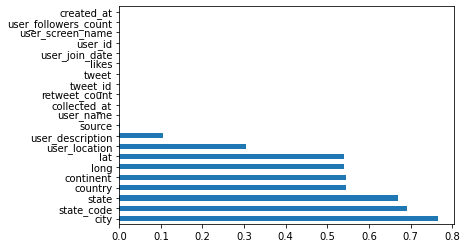

In [13]:
DT_miss_perc=DT_df.isna().sum().sort_values(ascending=False)/len(DT_df)
DT_miss_perc.plot(kind='barh');

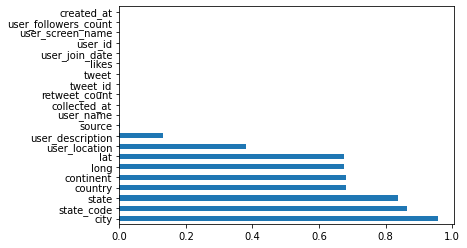

In [14]:
JB_miss_perc=DT_df.isna().sum().sort_values(ascending=False)/len(JB_df)
JB_miss_perc.plot(kind='barh');

Columns which have more than 50%  of values missing may not be much useful to the analysis,so we'll remove 'lat','long','continent','state_code','city','country','state' from the both dataframes for a cleaner data.

In [15]:
DT_df=DT_df.drop(['lat','long','continent','state_code','city','country','state'],axis=1)
JB_df=JB_df.drop(['lat','long','continent','state_code','city','country','state'],axis=1)


In [16]:
DT_df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location',
       'collected_at'],
      dtype='object')

In [17]:
JB_df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location',
       'collected_at'],
      dtype='object')

###**Sentiment Analysis**
We'll now clean the tweets.,getting rid of the RTs,mentions and hyperlinks embedded in them,so it would be easier for a sentiment analysis.

We will be using Regex module for this.

In [18]:
def clean_twt(txt):
  txt=re.sub(r'@[A-Za-z0-9]+','',txt)
  txt=re.sub(r'#','',txt)
  txt=re.sub(r'RT[\s+]','',txt)
  txt=re.sub(r'https?://S+','',txt)
  return txt

In [19]:
DT_df['tweet']=DT_df['tweet'].apply(clean_twt)
JB_df['tweet']=JB_df['tweet'].apply(clean_twt)

In [20]:
DT_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,collected_at
0,2020-10-15 00:00:01,1.316529e+18,Elecciones2020 | En Florida: JoeBiden dice que...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"Trump: As a student I used to hear for years, ...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from Trump! Maybe he ...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! Trump ‘s ral...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,1.325589e+18,_ _Pazderski Sagten Sie nicht Sie wären kei...,0.0,0.0,Twitter Web App,3.427951e+09,Alexander P. Vogt,APVogt,Wenn das Aussprechen der Wahrheit »den Falsche...,2015-08-17 12:37:12,2106.0,NaN,2020-11-09 17:47:56.036006
970915,2020-11-08 23:59:48,1.325589e+18,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3.245258e+09,ahzy,ahhhzy,NaN,2015-05-10 19:56:37,19.0,NaN,2020-11-09 17:47:55.715870
970916,2020-11-08 23:59:53,1.325589e+18,AfD|ler reagieren panisch bis hysterisch auf d...,25.0,4.0,Twitter Web App,9.866108e+17,watchdog,wilke_tobias,Quis custodiet ipsos custodes?\n\nTV Journalis...,2018-04-18 14:21:49,3014.0,Saxony/GER,2020-11-09 17:47:55.975868
970917,2020-11-08 23:59:54,1.325589e+18,"First, you would need to compare that to pr...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,2012-08-20 03:53:11,1079.0,NaN,2020-11-09 17:47:56.012674


In [21]:
JB_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,collected_at
0,2020-10-15 00:00:01,1.316529e+18,Elecciones2020 | En Florida: JoeBiden dice que...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,HunterBiden HunterBidenEmails JoeBiden JoeBide...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,This is how Biden made his ! TrumpIsNotAmer...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,Watching and setting dvr. Let’s give him bonu...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,censorship HunterBiden Biden BidenEmails Biden...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying !\nParis and London dont give a f...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,2011-10-08 22:42:56,27.0,PARIS,2020-11-09 18:32:45.613547
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,2011-11-02 08:39:46,772.0,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,2016-09-30 18:06:56,15806.0,France,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“congiuntifuoriregione”\n\n‘Sono felice p...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,2012-03-19 12:07:06,5974.0,🌎,2020-11-09 18:32:45.599846


We've now cleaned the tweets on both dataframes.We can now use them for the analysis purpose.

###**Exploratory Analysis and Visualization**

We need subjectivity and polarity from the tweets so it will be easier to categorise  the tweets on the basis of their sentiments (Positive,Negative or Neutral).

We'll use textblob module for this.

In [22]:
from textblob import TextBlob
def getSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity 
def getPolarity(txt):
  return TextBlob(txt).sentiment.polarity
DT_df['Subjectivity']=DT_df['tweet'].apply(getSubjectivity)
JB_df['Subjectivity']=JB_df['tweet'].apply(getSubjectivity)
DT_df['Polarity']=DT_df['tweet'].apply(getPolarity)
JB_df['Polarity']=JB_df['tweet'].apply(getPolarity)

In [23]:
DT_df=DT_df.sort_values(by=['Polarity'],ascending=False)
JB_df=JB_df.sort_values(by=['Polarity'],ascending=False)

In [24]:
JB_df.head(10)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,collected_at,Subjectivity,Polarity
313135,2020-11-03 01:33:41,1.323438e+18,"Yay! My Senator, 's husband is on !!\nAnd pre...",0.0,0.0,Twitter for Android,5.338141e+08,𝐃𝐫.👻𝐏𝐞𝐫𝐬𝐨𝐧💀𝐅𝐚𝐤𝐞𝐧𝐚𝐦𝐞👻,MDH2K,Liberal AF⚡Political Junkie🌼Mom 🔴Indiana Unive...,2012-03-23 01:28:06,2826.0,"Ohio, USA",2020-11-04 09:48:02.559728,0.4,1.0
144941,2020-10-23 14:57:52,1.319654e+18,We are all proud of today! Thank you ! Dump...,0.0,0.0,Twitter for iPhone,1.631450e+07,Lisa Pandone-Benson ✡️,LisaPandone,"Foreign Affairs Commentator, CEO The Queen Est...",2008-09-16 18:21:31,1902.0,NaN,2020-10-27 18:08:21.258513,1.0,1.0
259593,2020-10-31 14:13:16,1.322542e+18,"TRUMP is racist, he calls us terrorists!!\nI w...",0.0,0.0,Twitter Web App,5.969173e+08,Omar Al-johmani,Omarjohmani,"Syrian young man 23 years old, I am an archite...",2012-06-02 00:05:45,14.0,Jordan,2020-11-01 11:09:11.696327,0.3,1.0
20860,2020-10-16 03:44:51,1.316948e+18,This is a blockbuster!! Brave person!\nVoteBid...,0.0,0.0,Twitter Web App,1.311082e+18,Ted2316,Ted23161,American Democracy will Survive \nMasks Save L...,2020-09-29 23:19:49,37.0,NaN,2020-10-21 03:03:44.025028318,1.0,1.0
574230,2020-11-07 16:28:27,1.325113e+18,It's official!! 🎉 Biden is the president elect...,0.0,0.0,Twitter for Android,1.120846e+18,Dumb Trump,DumbTrump11,"Real news, Fake President! #Resist",2019-04-24 00:26:18,142.0,NaN,2020-11-08 11:35:50.541105,0.9,1.0
362305,2020-11-04 02:23:18,1.323813e+18,Welcome Colorado! JoeBiden Projected Winner fo...,0.0,0.0,Twitter Web App,9.921171e+17,TRUE AMERICA,1TRUE_AMERICA,🇺🇸TRUE America🇺🇸 prevails for we were not foun...,2018-05-03 19:02:13,65.0,"Monterey Co., California, USA",2020-11-05 13:09:15.177681,0.9,1.0
462366,2020-11-05 04:04:14,1.324201e+18,Just need navada to win for JoeBiden .\nWish h...,2.0,1.0,Twitter Web App,2.475630e+09,Adnan Shah,AdnanafzalShah,"ISLAM ZINDABAD!!!\nComputer science engineer ,...",2014-05-03 15:23:57,23.0,SRINAGAR,2020-11-06 10:20:03.963047,0.4,1.0
670537,2020-11-07 19:52:28,1.325164e+18,انتخابات_آمریکا \nانتخابات_۲۰۲۰ \nElections202...,1.0,0.0,Twitter Web App,7.991327e+17,مٌفردِ مُذکَّرِ سالِم,harfeyar,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏خنُک آن قماربازی که...,2016-11-17 06:11:09,85.0,Islamic Republic of Iran,2020-11-08 11:12:07.026322,1.0,1.0
574223,2020-11-07 16:28:26,1.325113e+18,Biden PRESIDENT ELECT BIDEN!!!! https://t.co/r...,0.0,0.0,Twitter for iPhone,2.329104e+08,Justice0509 🌊🌺🌊,justice0509,"Independent mind, Say no to #alternativefacts ...",2011-01-01 18:25:50,5670.0,United States,2020-11-08 11:35:51.660066,0.9,1.0
124803,2020-10-23 02:31:26,1.319466e+18,Joe Biden laughing at Trump is the best thing ...,1.0,0.0,Twitter for Android,4.226276e+08,Μιχαήλ,sniktm,🌈🇬🇷 🇦🇺Ahhiyawan living on unceded land.,2011-11-27 13:53:28,347.0,"Naarm, Wurundjeri Land",2020-10-27 18:25:52.235225,0.3,1.0


Now that we have the subjectivity and polarity we'll move on to the tweet analysis , labeling them positive,negative or neutral.

In [25]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'     
  else:
    return 'Positive'  
DT_df['Analysis']=DT_df['Polarity'].apply(getAnalysis)
JB_df['Analysis']=JB_df['Polarity'].apply(getAnalysis)
DT_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,collected_at,Subjectivity,Polarity,Analysis
695306,2020-11-05 16:18:47,1.324386e+18,economy is best under a Trump presidency https...,0.0,0.0,Twitter Web App,1.880896e+09,Susan Wilcox,SuseWilcox,"University of Michigan MBA 1991, Finance Profe...",2013-09-18 21:01:26,2735.0,Michigan,2020-11-06 09:55:42.607482,0.30,1.0,Positive
455572,2020-11-02 22:57:44,1.323399e+18,_warmington ....and there you have it _warming...,2.0,0.0,Twitter Web App,7.882088e+07,Munson,munsen55,NaN,2009-10-01 06:03:36,83.0,"Ajax, On.",2020-11-03 14:24:26.970635,0.60,1.0,Positive
868925,2020-11-07 18:00:44,1.325136e+18,Great!! This is it for the Republicans Exit Tr...,0.0,0.0,Twitter for Android,3.605871e+08,Stef Poirot,StefPoirot,"""Respectez les autres et ils vous respecteront...",2011-08-23 13:03:03,463.0,France,2020-11-08 10:51:00.068268,0.75,1.0,Positive
421417,2020-11-02 05:29:31,1.323135e+18,Trump video is awesome! shows BidenCrimeSyndic...,0.0,0.0,Twitter Web App,1.249902e+18,Robert Johnson,RobertJ92623620,#AmericaFirst #trump2020 #NYRangers #giants #n...,2020-04-14 03:26:57,1058.0,NaN,2020-11-04 10:27:10.493402,1.00,1.0,Positive
433451,2020-11-02 14:22:17,1.323269e+18,Trump to win! Election2020 Trump https://t.co/...,0.0,0.0,Twitter for Android,1.025865e+18,OdysseusSpur 🇬🇧 #THFC #KBF,ScottPN75,"Spurs fan for nearly 30 years, graduate of the...",2018-08-04 22:03:32,825.0,"England, United Kingdom",2020-11-03 14:28:28.813110,0.40,1.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656785,2020-11-05 00:56:49,1.324154e+18,Their desperation is disgusting at this point...,7.0,0.0,Twitter for iPhone,1.242248e+18,Tony,TravelsWithTony,I like traveling to all the places ✈️ Spend my...,2020-03-24 00:31:37,246.0,NaN,2020-11-06 10:01:54.814187,1.00,-1.0,Negative
362731,2020-10-31 03:13:48,1.322376e+18,Trump is making my headEXPLODE!!! He keeps sa...,0.0,0.0,Twitter Web App,1.185337e+18,Mind_Jedi,Mind_Jedi_Dr,RT a lot. Very Political. My 1st twitter acct ...,2019-10-18 23:33:33,478.0,NaN,2020-11-01 10:55:13.867879,1.00,-1.0,Negative
725968,2020-11-06 00:03:40,1.324503e+18,Go ahead with your litigation! You are lying ...,1.0,0.0,Twitter for iPad,9.486357e+08,brenda,brp55,NaN,2012-11-14 22:41:58,10.0,NaN,2020-11-07 11:37:26.156204,1.00,-1.0,Negative
101523,2020-10-20 04:41:18,1.318412e+18,MarchToThePollsForJoe 😎😎😎😎😎😎😎😎😎\nRestore decen...,2.0,0.0,Twitter Web App,3.863951e+08,t Logan,greeneyes3470,"I Really am a nice person, but Trump makes my...",2011-10-07 06:35:04,263.0,NaN,2020-10-21 10:42:48.942682752,1.00,-1.0,Negative


In [26]:
JB_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,collected_at,Subjectivity,Polarity,Analysis
313135,2020-11-03 01:33:41,1.323438e+18,"Yay! My Senator, 's husband is on !!\nAnd pre...",0.0,0.0,Twitter for Android,5.338141e+08,𝐃𝐫.👻𝐏𝐞𝐫𝐬𝐨𝐧💀𝐅𝐚𝐤𝐞𝐧𝐚𝐦𝐞👻,MDH2K,Liberal AF⚡Political Junkie🌼Mom 🔴Indiana Unive...,2012-03-23 01:28:06,2826.0,"Ohio, USA",2020-11-04 09:48:02.559728,0.4,1.0,Positive
144941,2020-10-23 14:57:52,1.319654e+18,We are all proud of today! Thank you ! Dump...,0.0,0.0,Twitter for iPhone,1.631450e+07,Lisa Pandone-Benson ✡️,LisaPandone,"Foreign Affairs Commentator, CEO The Queen Est...",2008-09-16 18:21:31,1902.0,NaN,2020-10-27 18:08:21.258513,1.0,1.0,Positive
259593,2020-10-31 14:13:16,1.322542e+18,"TRUMP is racist, he calls us terrorists!!\nI w...",0.0,0.0,Twitter Web App,5.969173e+08,Omar Al-johmani,Omarjohmani,"Syrian young man 23 years old, I am an archite...",2012-06-02 00:05:45,14.0,Jordan,2020-11-01 11:09:11.696327,0.3,1.0,Positive
20860,2020-10-16 03:44:51,1.316948e+18,This is a blockbuster!! Brave person!\nVoteBid...,0.0,0.0,Twitter Web App,1.311082e+18,Ted2316,Ted23161,American Democracy will Survive \nMasks Save L...,2020-09-29 23:19:49,37.0,NaN,2020-10-21 03:03:44.025028318,1.0,1.0,Positive
574230,2020-11-07 16:28:27,1.325113e+18,It's official!! 🎉 Biden is the president elect...,0.0,0.0,Twitter for Android,1.120846e+18,Dumb Trump,DumbTrump11,"Real news, Fake President! #Resist",2019-04-24 00:26:18,142.0,NaN,2020-11-08 11:35:50.541105,0.9,1.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361019,2020-11-04 02:07:02,1.323809e+18,TEXAS going insane - 38 electoral votes\n\nDon...,4.0,0.0,Twitter for iPhone,1.108409e+09,Abheet | अभीत,journo_abheet,Journalist | Scholar @UniStrathclyde MLitt Dig...,2013-01-21 08:05:06,232.0,"Glasgow, UK",2020-11-05 13:09:18.975511,1.0,-1.0,Negative
744937,2020-11-08 02:07:27,1.325259e+18,“Let the grim era of demonization begin to end...,2.0,1.0,Twitter for iPhone,2.869480e+09,Azita Emami,azitaema,"PhD, MSN, BSNT, RN, FAAN and Executive Dean, U...",2014-10-21 20:46:13,346.0,Seattle,2020-11-09 18:38:43.440107,1.0,-1.0,Negative
170254,2020-10-25 10:23:30,1.320310e+18,Trump and his family think they have mastered...,1.0,0.0,Twitter for Android,1.284547e+18,JUST Precious,PPreciousone,YOUR VOTE IS YOUR VOICE & POWER!! VOTE!!,2020-07-18 17:54:46,12.0,NaN,2020-10-27 18:05:54.969222,1.0,-1.0,Negative
579939,2020-11-07 16:34:35,1.325114e+18,Democrats got them nasty Republicans outta her...,23.0,13.0,Twitter for iPhone,4.246089e+07,The Meaning Of Prentiss,RoyalPrince01,“I am not Cinderella. My life has not been a f...,2009-05-25 18:43:17,6288.0,"Chicago,IL",2020-11-08 11:21:03.621943,1.0,-1.0,Negative


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

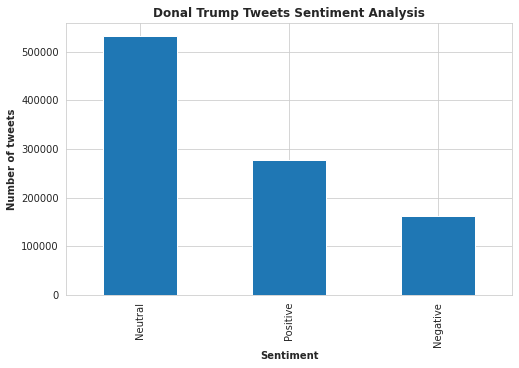

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
DTT=DT_df['Analysis'].value_counts()
plt.title('Donal Trump Tweets Sentiment Analysis',fontweight='bold')
DTT.plot(kind='bar')
plt.xlabel('Sentiment',fontweight='bold')
plt.ylabel('Number of tweets',fontweight='bold');

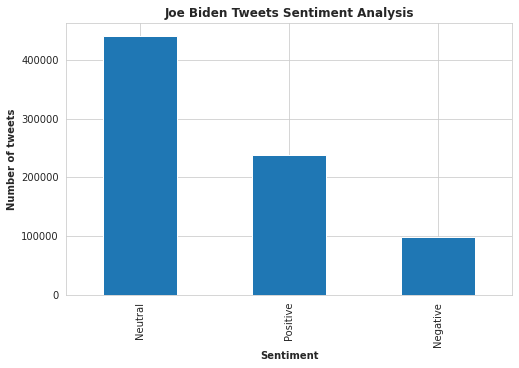

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
JBT=JB_df['Analysis'].value_counts()
plt.title('Joe Biden Tweets Sentiment Analysis',fontweight='bold')
JBT.plot(kind='bar')
plt.xlabel('Sentiment',fontweight='bold')
plt.ylabel('Number of tweets',fontweight='bold');

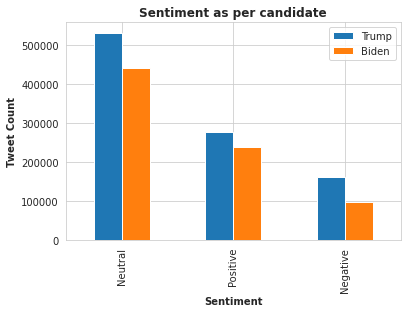

In [78]:
DTT
data={'Trump':DTT,'Biden':JBT}
df=pd.concat(data,axis=1)
df.plot(kind='bar')
plt.title('Sentiment as per candidate',fontweight='bold')
plt.xlabel('Sentiment',fontweight='bold')
plt.ylabel('Tweet Count',fontweight='bold');



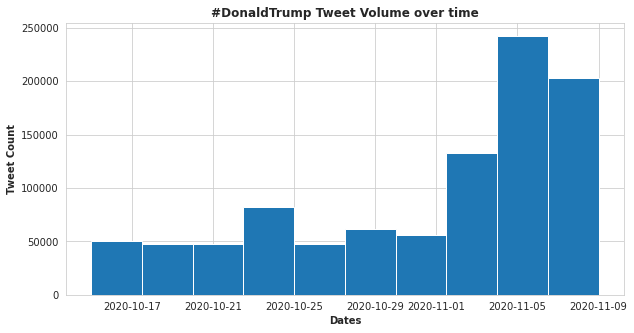

In [31]:
DT_df['created_at']=pd.to_datetime(DT_df['created_at'])
JB_df['created_at']=pd.to_datetime(JB_df['created_at'])
DT_df.created_at[0]
plt.figure(figsize=(10,5))
plt.hist(DT_df.created_at)
plt.title('#DonaldTrump Tweet Volume over time',fontweight='bold')
plt.xlabel('Dates',fontweight='bold')
plt.ylabel('Tweet Count',fontweight='bold');

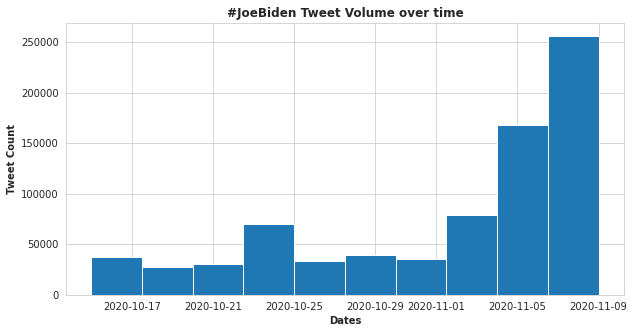

In [32]:
plt.figure(figsize=(10,5))
plt.hist(JB_df.created_at)
plt.title('#JoeBiden Tweet Volume over time',fontweight='bold')
plt.xlabel('Dates',fontweight='bold')
plt.ylabel('Tweet Count',fontweight='bold');

###**Questions about the data and answers to them**
  1.Who have the people tweeted the most about?
  
  2.How is the sentiment of the tweets of both the candidates?
  
  3.Who has the higher positive sentiment?
  
  4.How was the tweet volume over the time?


1.Clearly Donald Trump is the most tweeted about when compared with Joe Biden.

2.Both have higher volume of neutral tweets from our data,followed by the positive and then negative tweets.

3.Donald Trump hsa the higher positive sentiment.And he even has the higher negative sentiment than Joe Biden.

4.The tweets for Donald Trump were almost consistent until 1st November 2020, Joe biden had a much lesser volume of tweets on him.It volume rises abruptly between 1 Nov and 5 Nov.Biden's tweets were on the rise and Trump had them increase then fall back again.

###Summary and Conclusion

The data indicates higher neutral sentiment, I think this is because the way we calculate polarity should be optimised to understand the tweets better to classify them into positive or negative.Otherwise the data indicates lot people speak about Trump than Joe Biden.Tweets show people were engaged with Donald Trump than they were with Biden over a month earlier to the elections. 